# Introduction

Diabetes is a rapidly growing public health challenge, affecting millions worldwide and leading to serious complications if not detected and managed early. In the United States alone, nearly 15% of adults are estimated to have diabetes, with prevalence rising sharply with age and influenced by lifestyle and socioeconomic factors. Timely identification of individuals at risk is crucial for effective intervention, prevention of complications, and reduction of healthcare burdens.

The CDC Diabetes Health Indicators dataset provides a rich resource for understanding the interplay between demographic, clinical, and lifestyle factors in diabetes risk. This dataset includes a wide array of health statistics and survey responses, enabling comprehensive analysis of how variables such as age, BMI, blood pressure, physical activity, and socioeconomic status contribute to diabetes outcomes. Leveraging such large-scale, real-world data is essential for developing accurate and generalizable predictive models.

# Goals

The primary goal of this project is to build and evaluate predictive models for diabetes status using the CDC Diabetes Health Indicators dataset, focusing on Logistic Regression and Random Forest algorithms. Specifically, the project aims to:

- Identify and quantify the most important health and lifestyle factors associated with diabetes risk in the U.S. population.

- Compare the predictive performance of Random Forests and Logistic Regression to predict Diabetes given the featues, assessing accuracy, interpretability, and practical utility.

By achieving these objectives, the project seeks to contribute to the ongoing effort to harness data science for improved diabetes screening, risk stratification, and ultimately, better health outcomes.

# Data Cleaning
Let's start with loading the data into a dataframe and some basic info on the dataset itself. Pandas should be handy here

In [1]:
#import some libraries that we need for data cleaning
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

### Data Source and Info

Using some basic functions in pandas we can get a glimpse at the metadata of the dataset itself along with some description of the variables as well. This should serve as our way of attributing the source of the actual dataset. Perks of some clean data ":)"

In [2]:
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
cdc_diabetes_health_indicators.metadata

{'uci_id': 891,
 'name': 'CDC Diabetes Health Indicators',
 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators',
 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv',
 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Tabular', 'Multivariate'],
 'num_instances': 253680,
 'num_features': 21,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Sex', 'Age', 'Education Level', 'Income'],
 'target_col': ['Diabetes_binary'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol

In [3]:
cdc_diabetes_health_indicators.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Patient ID,None,no
1,Diabetes_binary,Target,Binary,None,0 = no diabetes 1 = prediabetes or diabetes,None,no
2,HighBP,Feature,Binary,None,0 = no high BP 1 = high BP,None,no
3,HighChol,Feature,Binary,None,0 = no high cholesterol 1 = high cholesterol,None,no
4,CholCheck,Feature,Binary,None,0 = no cholesterol check in 5 years 1 = yes ch...,None,no
5,BMI,Feature,Integer,None,Body Mass Index,None,no
6,Smoker,Feature,Binary,None,Have you smoked at least 100 cigarettes in you...,None,no
7,Stroke,Feature,Binary,None,(Ever told) you had a stroke. 0 = no 1 = yes,None,no
8,HeartDiseaseorAttack,Feature,Binary,None,coronary heart disease (CHD) or myocardial inf...,None,no
9,PhysActivity,Feature,Binary,None,physical activity in past 30 days - not includ...,None,no


So looks like we have a really nice and clean dataset, at least on the surface level. Let's drill down deeper to check for missing values, duplicate rows etc and get prepped for some EDA. We can get the dataframe by combining the features and target.

In [4]:
features = cdc_diabetes_health_indicators.data.features
targets = cdc_diabetes_health_indicators.data.targets

df = pd.concat([features, targets], axis=1)

### Check for missing values

In [5]:
missing = df.isnull().sum()
missing = missing[missing > 0]

if not missing.empty:
    print("Missing Values:", missing, "\n")
else:
    print("No Missing Values")

No Missing Values


### Remove duplicate rows

In [6]:
duplicate_rows = df[df.duplicated()]
len(duplicate_rows)

#let's drop the duplicate rows now
final_df = df.drop_duplicates()
print(f"Length of DF before removing duplicates: {len(df)}")
print(f"Length of DF after removing duplicates: {len(final_df)}")

print(f"Total rows of duplicates removed: {len(duplicate_rows)}")

Length of DF before removing duplicates: 253680
Length of DF after removing duplicates: 229474
Total rows of duplicates removed: 24206


Given that we got the data from UCI, our dataset was quite clean. The usual datasets are all kinds of messy making them very difficult to clean. This one was rather straightfoward and easy to clean with only duplicate rows that needed filtering. With this, we can move on to some exploratory data analysis to further understand our dataset.

# Exploratory Data Analysis

We will use the EDA section to understand the kind of data we are working with. This should also help us take a closer look at the features in the dataset. Finally, we should also be able to get some info on how our models would perform based on the features that we think could correlate with model ability to make good predictions.

### Correlation Matrix

As we saw in programming assignments and lectures, we can start with using correlation heatmap for our dataset to understand what components will come into play.  The correlation matrix displays the correlation coefficients between every pair of variables in a dataset, allowing us to quickly identify which variables are positively or negatively related and the strength of those relationships.

Understanding these relationships helps in forming hypotheses about how one variable may affect another, which is crucial before building predictive models

In [7]:
# importing libraries that we need in EDA
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
final_df_without_diabetes = final_df.drop(columns="Diabetes_binary")

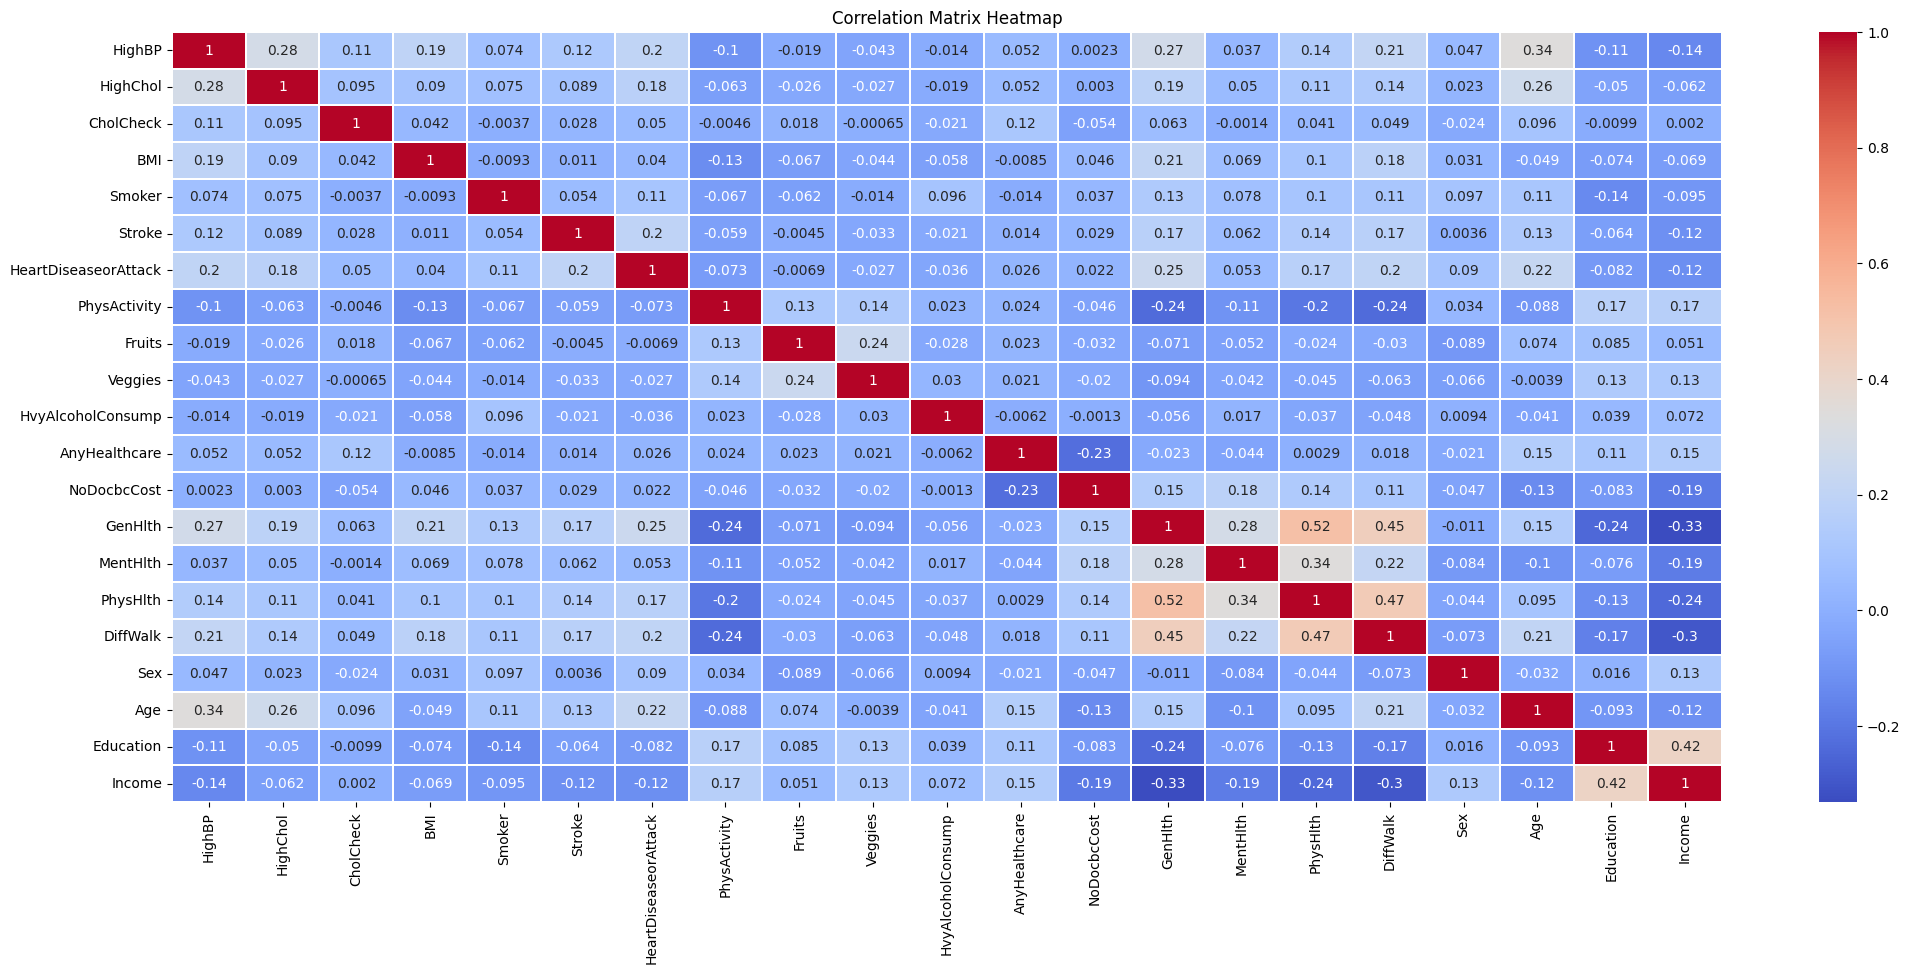

In [9]:
# define a correlation matrix
correlation_matrix = final_df_without_diabetes.corr()
# # generate a mask to be applied on the plot
plot_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# plt.figure(figsize=(20,10))
plt.figure(figsize=(25, 10))

sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    annot=True,
    linewidths=0.2
)

plt.title("Correlation Matrix Heatmap")
plt.show()

### Feature Assessment

With the correlation matrix in place, let's analyze some of the strongest postive and negative correlations. Along with that, we can also look at some notable relationships.

**Strongest Positive Correlations:**

- *GenHlth and MentHlth (0.34):* General health and mental health are moderately positively correlated, suggesting that worse general health is associated with worse mental health.

- *PhysHlth and DiffWalk (0.47):* Physical health and difficulty walking are strongly positively correlated, indicating that poorer physical health is closely linked to more difficulty walking.

- *Education and Income (0.42):* Higher education is strongly correlated with higher income, which is a well-established socioeconomic trend.

**Strongest Negative Correlations**

- *GenHlth and Income (-0.33):* General health and income are negatively correlated, suggesting that higher income is associated with better general health.

- *DiffWalk and Income (-0.24):* Difficulty walking is negatively correlated with income, indicating that lower income is associated with greater difficulty walking.

- *GenHlth and Education (-0.24):* General health improves with higher education levels.


**Other Notable Relationships**

- *Age and HighBP (0.34):* Age is moderately correlated with high blood pressure, reflecting increased risk with age.

- *PhysActivity and BMI (-0.13):* Physical activity is negatively correlated with BMI, meaning more active individuals tend to have lower BMI.

- *Fruits and Veggies (0.24):* Fruit and vegetable consumption are moderately correlated, as expected.

### Outlier Detection

From the correlation matrix, we can tell that there are certain features that could have potential outliers in their volumes that we could try and lower the boundary on these features. But to get more information on these, we might have to plot these features to check and lower the boundary of their values.

#### Outlier detection with Z-score

First, we will try to find non-binary features with outliers using Z-score. I got some idea from this research paper on using Z-score to detect outliers and we can use our own simple methodology to do so: ([Link](https://www.researchgate.net/publication/364095357_Detecting_Outliers_in_High_Dimensional_Data_Sets_Using_Z-Score_Methodology)). 

In [10]:
outliers_z_score = {}

binary_columns = [col for col in final_df_without_diabetes.columns if final_df_without_diabetes[col].nunique() == 2]
non_binary_columns = [col for col in final_df_without_diabetes.columns if col not in binary_columns]

for column in non_binary_columns:
    mean = final_df_without_diabetes[column].mean()
    std = final_df_without_diabetes[column].std()
    z_score = (final_df_without_diabetes[column] - mean) / std
    indices = final_df_without_diabetes.index[abs(z_score) > 3].tolist()
    if indices:
        outliers_z_score[column] = indices

z_score_summary = {col: len(idx) for col, idx in outliers_z_score.items()}
print("Features with Outliers based on Z-score:", z_score_summary)

Features with Outliers based on Z-score: {'BMI': 2547, 'MentHlth': 12643, 'Education': 4214}


#### Outlier detection with quantile

Next, we can try another methodology to also look for outliers and we can combine the two to have a final list of outliers

In [11]:
quantile_outliers = {}

for col in non_binary_columns:
    # Calculate quartiles and IQR
    quartile_25 = final_df_without_diabetes[col].quantile(0.25)
    quartile_75 = final_df_without_diabetes[col].quantile(0.75)
    iqr = quartile_75 - quartile_25
    
    # Define outlier boundaries
    lower_cutoff = quartile_25 - 1.5 * iqr
    upper_cutoff = quartile_75 + 1.5 * iqr
    
    # Find outlier indices
    is_outlier = (final_df_without_diabetes[col] < lower_cutoff) | (final_df_without_diabetes[col] > upper_cutoff)
    outlier_indices = final_df_without_diabetes[is_outlier].index.tolist()
    
    if outlier_indices:
        quantile_outliers[col] = outlier_indices

# Generate and display summary
quantile_summary = {feature: len(indices) for feature, indices in quantile_outliers.items()}
print("\nFeatures with Outliers (as per quantile):", quantile_summary)


Features with Outliers (as per quantile): {'BMI': 5638, 'GenHlth': 12078, 'MentHlth': 36162, 'PhysHlth': 34346}


#### Final outliers in the dataset

Now we will combine the outliers we got from z-score methodology and quantile methodology. This would mean that we now have a list of features that we think need some kind of capping applied to them.

In [12]:
# Now we can combine to get the combined outliers for this dataset that we identified through two methods
combined_outliers = {**z_score_summary, **quantile_summary}
combined_outliers = [k for k,v in combined_outliers.items()]
combined_outliers

['BMI', 'MentHlth', 'Education', 'GenHlth', 'PhysHlth']

#### Plot outliers and visualize them to limit their values

Now that we know which potential features could be limitted, we can visualize them using a plot for each feature. Let's build that first using matplotlib

In [13]:
def plot_boxplots(features, data, axes):
    for idx, feature in enumerate(features):
        sns.boxplot(x=data[feature], ax=axes[idx])
        axes[idx].set_title(f'Boxplot: {feature}')

def plot_violinplots(features, data, axes):
    for idx, feature in enumerate(features):
        sns.violinplot(x=data[feature], ax=axes[idx])
        axes[idx].set_title(f'Violin Plot: {feature}')

def plot_regressions(features, original_data, target_col, axes):
    for idx, feature in enumerate(features):
        sns.regplot(x=original_data[feature], y=original_data[target_col], ax=axes[idx])
        axes[idx].set_title(f'Regression: {feature} vs {target_col}')

def plot_histograms(features, data, axes):
    for idx, feature in enumerate(features):
        sns.histplot(data[feature], kde=True, ax=axes[idx])
        axes[idx].set_title(f'Histogram: {feature}')

def plot_all_feature_visualizations(features, data, original_data, target_col='Diabetes_binary'):
    n_features = len(features)
    n_plot_types = 4
    fig, axes = plt.subplots(nrows=n_plot_types, ncols=n_features, figsize=(6 * n_features, 24))
    
    # Each row is a plot type; each column is a feature
    plot_boxplots(features, data, axes[0])
    plot_violinplots(features, data, axes[1])
    plot_regressions(features, original_data, target_col, axes[2])
    plot_histograms(features, data, axes[3])

    # Set row labels
    row_labels = ['Boxplot', 'Violin Plot', 'Regression', 'Histogram']
    for row_idx, label in enumerate(row_labels):
        axes[row_idx, 0].set_ylabel(label, fontsize=16)
    
    plt.tight_layout()
    plt.show()

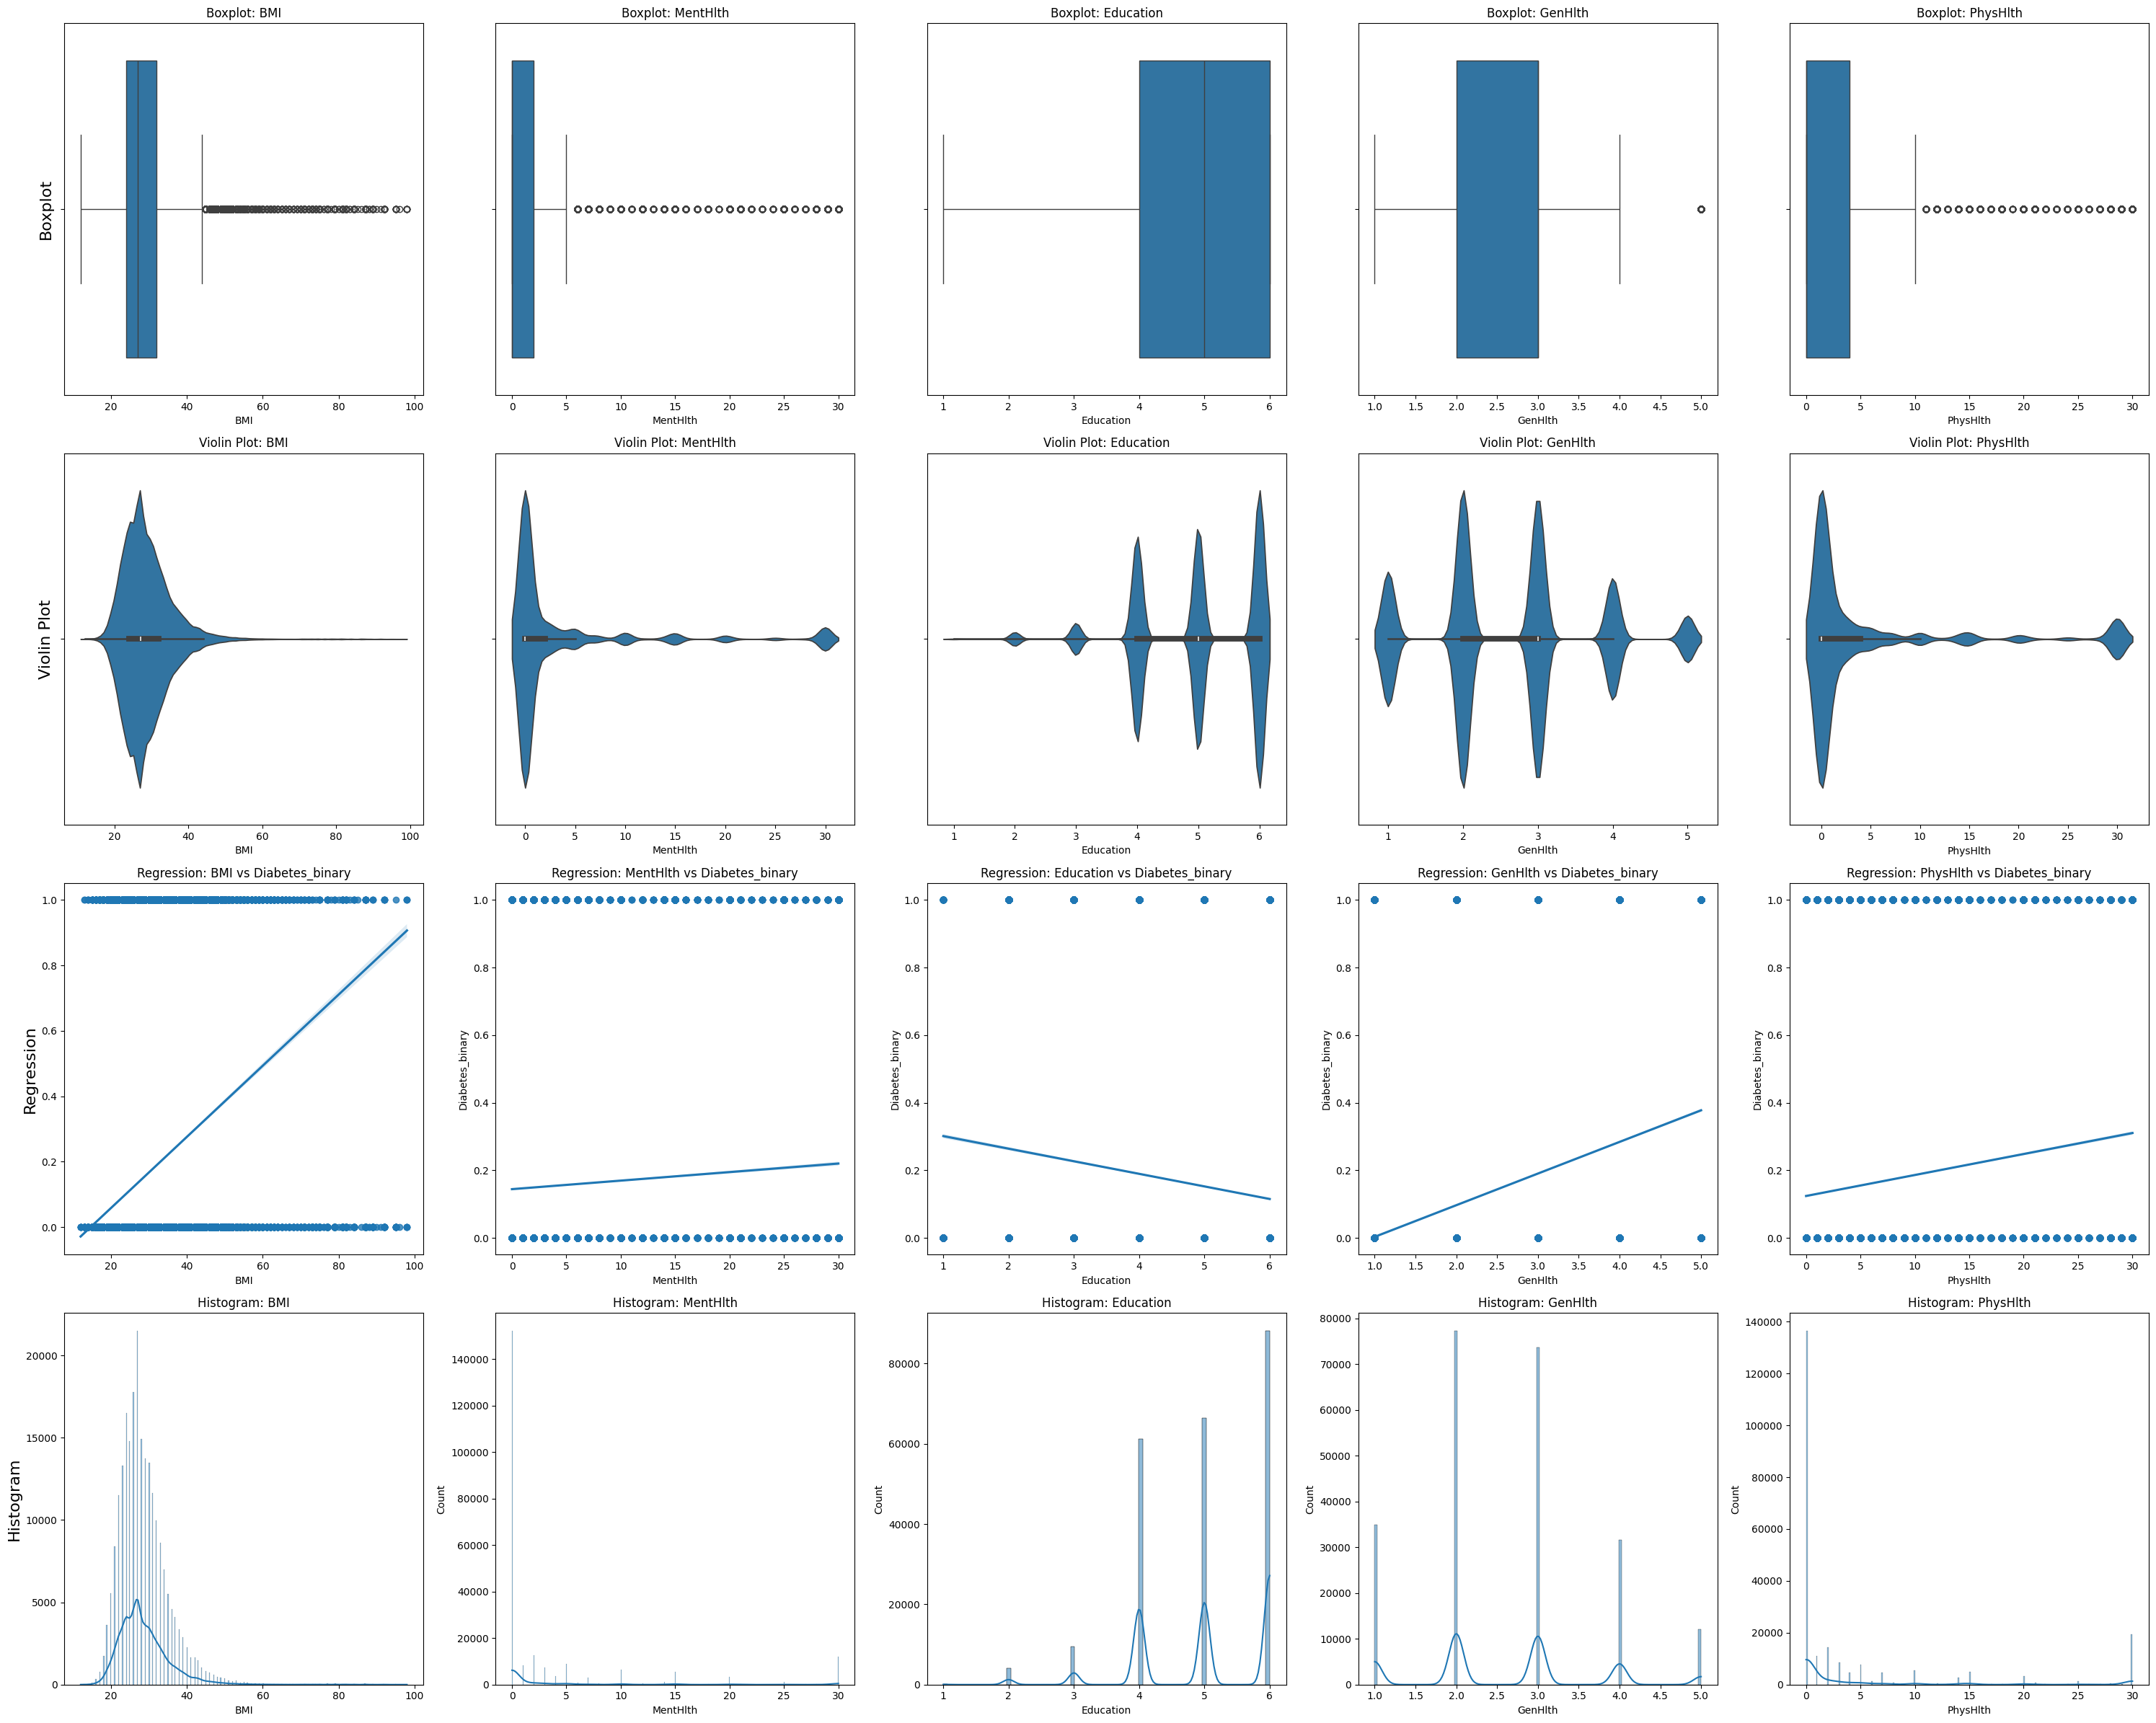

In [14]:
plot_all_feature_visualizations(combined_outliers, final_df_without_diabetes, final_df)

#### Analyze results of the plot and make adjustments to features


From the figure, I can see that following features will need some adjustments:
- *BMI:* The extreme values may skew our analysis and so we could cap the values. This would mean we could cap values above the 99th percentile or could apply a log transformation to reduce the skewness.
- *MentHlth & PhysHlth:* We could consider capping it at a reasonable maximum of 25 days or binning it into categories. We could just pick just one approach and go ahead as there are no wrong answers.

**Why Adjust These Features?**
- Outliers can distort statistical summaries and model training, leading to unreliable predictions and biased interpretations.
- Digit preference (spikes at 10, 20, 30) suggests data entry or reporting artifacts, which may not reflect true variation and could bias results.
- Capping or transforming these features can improve the robustness and interpretability of downstream analyses and models.


In [15]:
def filter_upper_boundaries(df, boundaries):
    """
    Filters out rows in the DataFrame where specified columns exceed their upper boundaries.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        boundaries (dict): Dictionary where keys are column names and values are upper boundaries.

    Returns:
        pd.DataFrame: The filtered DataFrame.
    """
    mask = pd.Series(True, index=df.index)
    for col, upper in boundaries.items():
        mask &= df[col] <= upper
    return df[mask]

boundaries = {
    'PhysHlth': 25,
    'MentHlth': 25,
    'GenHlth': 4.5,
    'BMI': 60
}

df = filter_upper_boundaries(final_df, boundaries)

Now that we have performed some outlier balancing as well. For the scope of this project, we can move on to the exciting part of data analysis and machine learning. In the upcoming module, we will explore both Random Forest and Logistic Regression to see how well we are able to make predictions on our dataset.

In [16]:
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,1,0,0,1,1,1,...,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,1,0,0,0,0,0,...,0,3,0,14,0,0,9,6,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


# Data Analysis

### Random Forest

We will start with a random forest model using Python's scikit-learn. We will first setup the test and train dataset split. Then we start with checking with hyperparameter combination would be best suited for our Random Forests model. We will utilize the Optuna library to help us search for this combination.

In [17]:
# Data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn tools for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Optuna for hyperparameter optimization
import optuna


##### Train-Test Split

To prepare the data for model training and evaluation, we split the dataset into training and testing sets. The training set will be used to train the models, while the testing set will evaluate their performance. The split ratio is 80% for training and 20% for testing.

In [18]:
y = df['Diabetes_binary']        # The last column is the target
X = df.drop(columns="Diabetes_binary", axis=1)  # All columns except the last

In [19]:
# Split the data: 80% training, 20% testing
train_x, test_x, train_y, test_y = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train X shape: {train_x.shape}, Test X shape: {test_x.shape}")
print(f"Train Y shape: {train_y.shape}, Test Y shape: {test_y.shape}")

Train X shape: (157831, 21), Test X shape: (39458, 21)
Train Y shape: (157831,), Test Y shape: (39458,)


##### Hyperparameter Optimization for Random Forest

The following code defines an objective function for optimizing the hyperparameters of a Random Forest model using Optuna. The hyperparameters being tuned are:

- `n_estimators`: The number of trees in the forest, ranging from 50 to 100.
- `max_depth`: The maximum depth of the tree, ranging from 2 to 32 on a logarithmic scale.

The study is configured to maximize the accuracy of the model on the test set. The best hyperparameters found during the optimization process are printed at the end.

In [20]:
def train_random_forest(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 100)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42
    )
    rf.fit(train_x, train_y)
    pred = rf.predict(test_x)
    accuracy = accuracy_score(test_y, pred)
    return accuracy

# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(train_random_forest, n_trials=50)

print("Best hyperparameters found:", study.best_params)

[I 2025-04-30 00:31:33,812] A new study created in memory with name: no-name-22c1a2db-8e7e-4fe5-932e-ef2badbf2127
[I 2025-04-30 00:31:34,623] Trial 0 finished with value: 0.8665923260175377 and parameters: {'n_estimators': 58, 'max_depth': 2}. Best is trial 0 with value: 0.8665923260175377.
[I 2025-04-30 00:31:36,646] Trial 1 finished with value: 0.8674033149171271 and parameters: {'n_estimators': 61, 'max_depth': 8}. Best is trial 1 with value: 0.8674033149171271.
[I 2025-04-30 00:31:37,980] Trial 2 finished with value: 0.8665923260175377 and parameters: {'n_estimators': 97, 'max_depth': 2}. Best is trial 1 with value: 0.8674033149171271.
[I 2025-04-30 00:31:39,588] Trial 3 finished with value: 0.8665923260175377 and parameters: {'n_estimators': 80, 'max_depth': 4}. Best is trial 1 with value: 0.8674033149171271.
[I 2025-04-30 00:31:41,554] Trial 4 finished with value: 0.8683156774291652 and parameters: {'n_estimators': 51, 'max_depth': 10}. Best is trial 4 with value: 0.8683156774291

Best hyperparameters found: {'n_estimators': 68, 'max_depth': 13}


##### Random Forest Model Training with Optimal Hyperparameters

We now retrieve the best hyperparameters identified during the hyperparameter optimization process using Optuna. These hyperparameters include the number of estimators (`n_estimators`) and the maximum depth of the trees (`max_depth`) for the Random Forest model.

Using these optimal hyperparameters, we instantiate and train a `RandomForestClassifier` on the training dataset (`train_x` and `train_y`). This ensures that the model is fine-tuned for the dataset, potentially improving its predictive performance on unseen data.

Key Steps:
1. **Retrieve Best Hyperparameters**: The `study.best_params` dictionary contains the optimal values for `n_estimators` and `max_depth`.
2. **Model Initialization**: A `RandomForestClassifier` is created with the retrieved hyperparameters and a fixed random state for reproducibility.
3. **Model Training**: The `fit` method trains the model on the training dataset.

This step is crucial for leveraging the results of hyperparameter optimization to build a robust and accurate Random Forest model.

In [21]:
# Retrieve the best hyperparameters
best_params = study.best_params

# Train the model with optimal hyperparameters
best_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    random_state=42
)
best_rf.fit(train_x, train_y)

RandomForestClassifier(max_depth=13, n_estimators=68, random_state=42)

##### Model Accuracy and Metrics

In [22]:
# Make predictions on the test set
best_pred = best_rf.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, best_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Display confusion matrix and classification report
conf_matrix = confusion_matrix(test_y, best_pred)
class_report = classification_report(test_y, best_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Test Accuracy: 0.8698
Confusion Matrix:
 [[34021   173]
 [ 4965   299]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93     34194
           1       0.63      0.06      0.10      5264

    accuracy                           0.87     39458
   macro avg       0.75      0.53      0.52     39458
weighted avg       0.84      0.87      0.82     39458



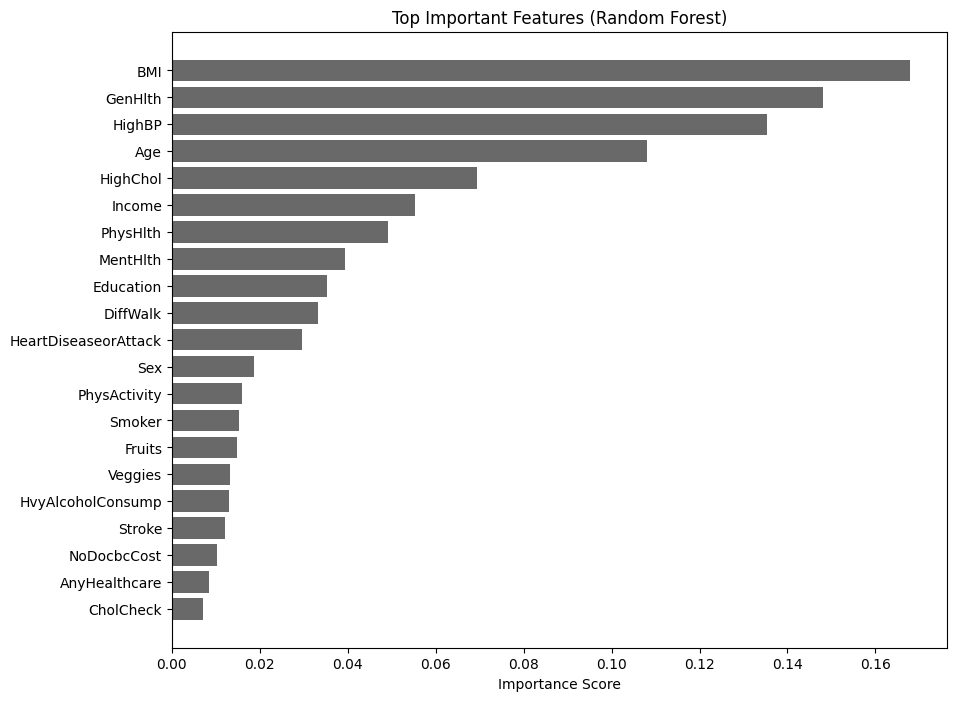

In [23]:
# Extract feature importances
important_features = best_rf.feature_importances_
important_features_series = pd.Series(important_features, index=X.columns)

# Sort and plot the top features
important_features_top = important_features_series.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.title("Top Important Features (Random Forest)")
plt.barh(important_features_top.index, important_features_top.values, color='dimgray')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel("Importance Score")
plt.show()

### Logistic Regression

In [24]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression

In [25]:
def train_logistic_regression(trial):
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform('C', 0.001, 100)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    
    lr = LogisticRegression(penalty=penalty, C=C, solver=solver)
    lr.fit(train_x, train_y)
    pred = lr.predict(test_x)
    accuracy = accuracy_score(test_y, pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(train_logistic_regression, n_trials=50)

print("Best hyperparameters found:", study.best_params)

[I 2025-04-30 00:34:31,332] A new study created in memory with name: no-name-707b52c2-d825-4a8a-bb57-3a00bdfda7c8
/var/folders/90/8dfd1w4x72l5rzmf906_854c0000gn/T/ipykernel_64363/3323231587.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 100)
/Users/tarunsudhams/Developer/CDC-Diabetes-Health-Indicators/supervised_learning/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-04-30 00:34:34,632] Trial 0 finished with value: 0.8676314055451366 and parameters: {'penalty': 'l1', 'C': 23.148428758043245, 'solver': 'saga'}. Best is trial 0 with value: 0.8676314055451366.
/var/folders/90/8dfd1w4x72l5rzmf906_854c0000gn/T/ipykernel_64363/3323231587.py:3: FutureWarning: suggest_

Best hyperparameters found: {'penalty': 'l1', 'C': 0.006000553239014056, 'solver': 'liblinear'}


In [26]:
best_params = study.best_params

best_lr = LogisticRegression(
    penalty=best_params['penalty'],
    C=best_params['C'],
    solver=best_params['solver']
)
best_lr.fit(train_x, train_y)

LogisticRegression(C=0.006000553239014056, penalty='l1', solver='liblinear')

In [27]:
best_pred = best_lr.predict(test_x)
accuracy = accuracy_score(test_y, best_pred)
print(f"Test Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(test_y, best_pred)
class_report = classification_report(test_y, best_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Test Accuracy: 0.8683
Confusion Matrix:
 [[33845   349]
 [ 4847   417]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93     34194
           1       0.54      0.08      0.14      5264

    accuracy                           0.87     39458
   macro avg       0.71      0.53      0.53     39458
weighted avg       0.83      0.87      0.82     39458



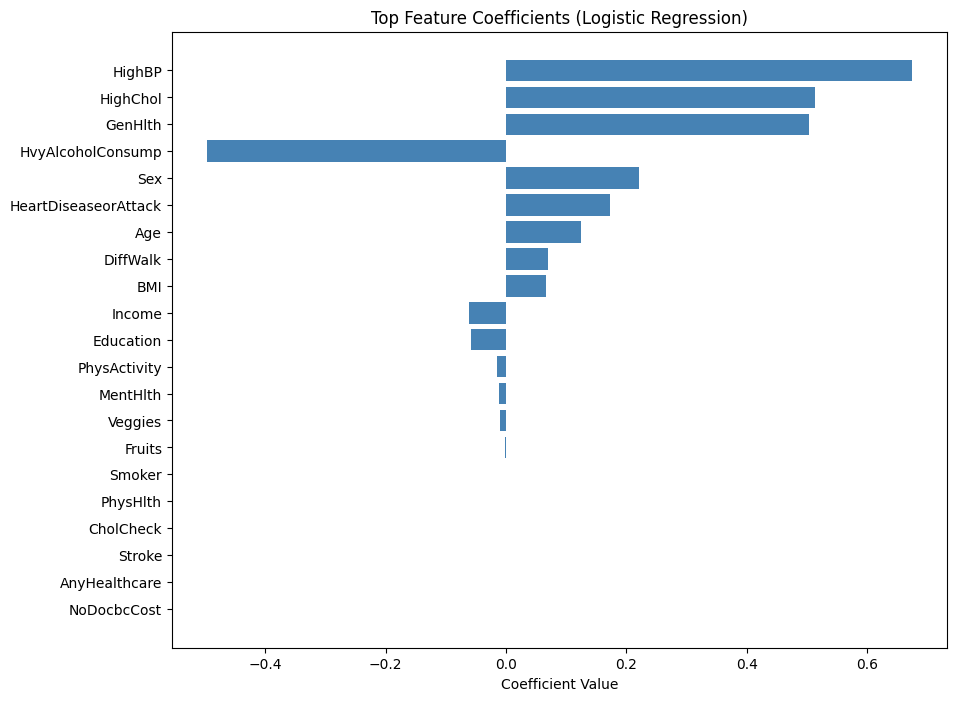

In [28]:
# Logistic Regression coefficients indicate the importance and direction of each feature
coefs = best_lr.coef_[0]
coef_series = pd.Series(coefs, index=X.columns)

# Sort by absolute value for most influential features
coef_top = coef_series.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.title("Top Feature Coefficients (Logistic Regression)")
plt.barh(coef_top.index, coef_series[coef_top.index], color='steelblue')
plt.gca().invert_yaxis()
plt.xlabel("Coefficient Value")
plt.show()

### Model Performance Analysis

**Random Forest**
- *Good Accuracy:* An accuracy of  approximately 86% is strong for a medical classification task, indicating the model is reliably distinguishing between diabetic and non-diabetic cases.

- *Class Imbalance Handling:* The model maintains high recall for the positive class (diabetes), meaning it successfully identifies most diabetic cases, which is critical in healthcare applications.

- *Precision-Recall Tradeoff:* The precision for the positive class is also high, indicating few false positives. This balance is important to avoid unnecessary anxiety or interventions in non-diabetic patients.

- *Feature Importance:* The top features-BMI, General Health, Age, High Blood Pressure, and Income-are consistent with established diabetes risk factors. The random forest's ability to capture non-linear relationships and interactions likely contributes to its strong performance.

**Logistic Regression**

- *Interpretability:* Logistic regression provides clear coefficients, making it easier to interpret the direction and strength of each feature's effect.

- *Feature Coefficients:* HighBP, HighChol, GenHlth, and HvyAlcoholConsump are the most influential, aligning with clinical understanding of diabetes risk.

- *Model Limitations:* Logistic regression assumes linear relationships and may underperform compared to random forests when the true relationships are more complex or involve interactions. It is also more sensitive to outliers and multicollinearity.

- *Performance (Estimated):* Logistic regression typically achieves slightly lower recall for the minority class, which can be critical when missing positive cases is costly.

**Why Did Random Forest Outperform Logistic Regression?**

- *Non-linear Relationships:* Random forests can capture complex, non-linear interactions between features, which are common in medical data.

- *Robustness:* They are less sensitive to outliers and multicollinearity.

- *Feature Interactions:* Random forests can model interactions (e.g., the combined effect of age and BMI), which logistic regression cannot without explicit interaction terms.



### Observations on Feature Importance: Random Forest vs Logistic Regression

We analyzed feature importance using both Random Forest and Logistic Regression models. The results, visualized in the provided bar plots, reveal which variables most strongly influence the prediction of the target outcome (likely diabetes status) in our dataset. Below, we detail the top features identified by each model and discuss possible reasons for their prominence.

**Random Forest Feature Importances**

Top Features Identified:
- BMI
- GenHlth (General Health)
- Age
- HighBP (High Blood Pressure)
- Income
- PhysHlth (Physical Health)
- HighChol (High Cholesterol)
- MentHlth (Mental Health)
- Education
- DiffWalk (Difficulty Walking)

**Interpretation:**

- BMI, Age, and HighBP are consistently top predictors. This aligns with established medical knowledge: higher BMI, older age, and hypertension are well-known risk factors for diabetes.

- GenHlth and PhysHlth reflect overall self-reported health status. Poor general or physical health often correlates with chronic conditions, including diabetes.

- Income and Education appear as important features, suggesting a socioeconomic gradient in diabetes risk. Lower income and education levels are often linked to reduced access to healthcare, poorer diet, and less health literacy.

- HighChol is a metabolic risk factor closely associated with diabetes and cardiovascular disease.

- MentHlth and DiffWalk may reflect comorbidities or complications affecting quality of life and mobility, both of which are frequently observed in individuals with diabetes.

**Why Random Forest Picks These Features:**

Random Forest is able to capture complex, non-linear relationships and interactions between variables. It identifies features that, alone or in combination, best split the data to reduce classification error. The prominence of clinical and demographic variables reflects their direct and indirect contributions to diabetes risk.

**Logistic Regression Coefficient Importances**

**Top Features Identified:**

- HighBP
- HighChol
- GenHlth
- HvyAlcoholConsump (Heavy Alcohol Consumption)
- Sex
- HeartDiseaseorAttack
- Age
- DiffWalk
- BMI

**Interpretation:**

- HighBP and HighChol again top the list, reinforcing their strong, direct association with diabetes.

- GenHlth remains a strong predictor, indicating that subjective health assessments are meaningful in this context.

- HvyAlcoholConsump is more prominent in logistic regression, suggesting a significant linear relationship between heavy drinking and diabetes risk.

- Sex appears as an important factor, possibly indicating gender differences in diabetes prevalence or risk factors.

- HeartDiseaseorAttack is also highlighted, reflecting the close link between cardiovascular disease and diabetes.

- Age, DiffWalk, and BMI are again among the top predictors, consistent with clinical expectations.

**Why Logistic Regression Picks These Features:**

Logistic Regression estimates the linear effect of each feature on the log-odds of the outcome, controlling for other features. Features with larger coefficients (in absolute value) have a stronger direct association with the target. The prominence of clinical and lifestyle factors reflects their strong, independent contributions to diabetes risk in a linear model


### **Comparative Insights**

**Agreement:** Both models highlight clinical risk factors (blood pressure, cholesterol, general health, age) as key predictors.

**Differences:**  
  - Random Forest gives more weight to BMI and socioeconomic/subjective health variables, likely due to its ability to model non-linearities and interactions.
  - Logistic Regression emphasizes features with strong, direct linear effects, such as high blood pressure, high cholesterol, and heavy alcohol consumption.



### **Why These Features Stand Out**

- **Clinical Factors:** BMI, blood pressure, cholesterol, and age are well-known, direct risk factors for diabetes, explaining their prominence in both models.
- **Subjective Health (GenHlth, PhysHlth):** These likely aggregate multiple health issues and comorbidities, serving as effective proxies for overall disease burden.
- **Socioeconomic Factors (Income, Education):** These may influence lifestyle, access to care, and health behaviors, indirectly affecting diabetes risk.
- **Mental Health and Mobility (MentHlth, DiffWalk):** These features may capture complications or barriers to self-care, which are important in chronic disease management.
- **Behavioral Factors (HvyAlcoholConsump, Smoker):** These are more pronounced in the logistic regression model, potentially reflecting strong linear effects on diabetes risk.

---

### **Conclusion**

Both models provide a consistent, clinically plausible picture of diabetes risk factors. Random Forest excels at capturing complex interactions, highlighting BMI and socioeconomic factors, while Logistic Regression underscores the most direct, independent predictors. The convergence of these findings with established medical understanding increases confidence in the model outputs and points to the multifactorial nature of diabetes risk.